In [883]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [884]:
df = pd.read_csv("dataset/house.csv")

In [885]:
df.head()

,Bed,Bath,Ft,price
0,4.0,2.5,2550.0,1400000.0
1,4.0,2.5,2994.0,1300000.0
2,2.0,1.0,1571.0,365000.0
3,3.0,3.5,5291.0,1450000.0
4,1.0,NaN,168.0,49900.0


In [886]:
df.shape

(700, 4)

In [887]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bed     689 non-null    float64
 1   Bath    662 non-null    float64
 2   Ft      695 non-null    float64
 3   price   700 non-null    float64
dtypes: float64(4)
memory usage: 22.0 KB


In [888]:
df.isnull().sum()

Bed      11
Bath     38
Ft        5
price     0
dtype: int64

In [889]:
df.dropna(inplace=True)

In [890]:
df.shape

(656, 4)

In [891]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 656 entries, 0 to 699
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bed     656 non-null    float64
 1   Bath    656 non-null    float64
 2   Ft      656 non-null    float64
 3   price   656 non-null    float64
dtypes: float64(4)
memory usage: 25.6 KB


In [892]:
df.describe()

,Bed,Bath,Ft,price
count,656.000000,656.000000,656.000000,6.560000e+02
mean,3.336890,2.408537,2244.131098,5.727076e+05
std,1.826249,1.361696,1644.489702,4.275095e+05
min,1.000000,0.500000,420.000000,7.500000e+04
25%,3.000000,2.000000,1401.500000,3.643000e+05
50%,3.000000,2.000000,1925.000000,4.694500e+05
75%,4.000000,3.000000,2593.750000,6.499250e+05
max,36.000000,12.500000,21798.000000,4.500000e+06


In [893]:
df.corr()

,Bed,Bath,Ft,price
Bed,1.000000,0.717814,0.714604,0.418503
Bath,0.717814,1.000000,0.763660,0.622681
Ft,0.714604,0.763660,1.000000,0.628303
price,0.418503,0.622681,0.628303,1.000000


<Axes: xlabel='Bed', ylabel='count'>

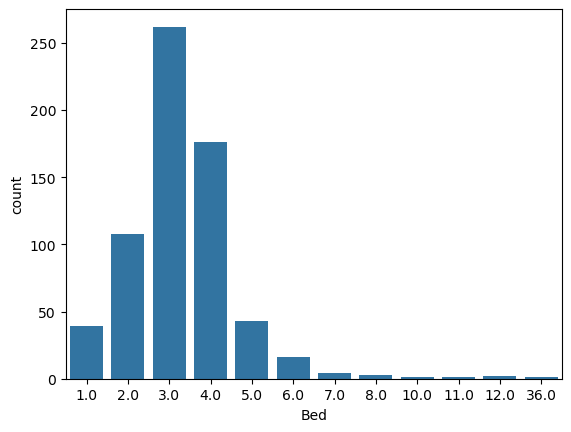

In [894]:
sns.countplot(x=df["Bed"])

(array([487., 149.,   9.,   4.,   1.,   4.,   0.,   1.,   0.,   1.]),
 array([  420. ,  2557.8,  4695.6,  6833.4,  8971.2, 11109. , 13246.8,
        15384.6, 17522.4, 19660.2, 21798. ]),
 <BarContainer object of 10 artists>)

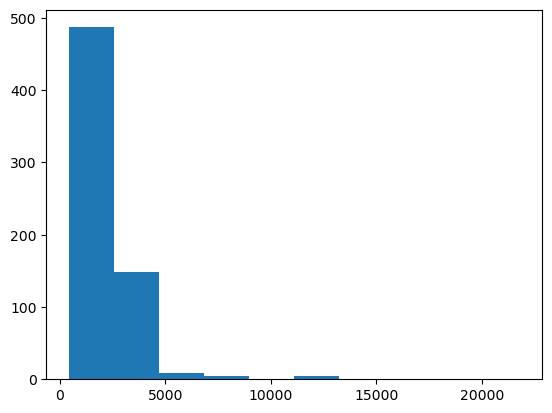

In [895]:
plt.hist(x=df["Ft"])

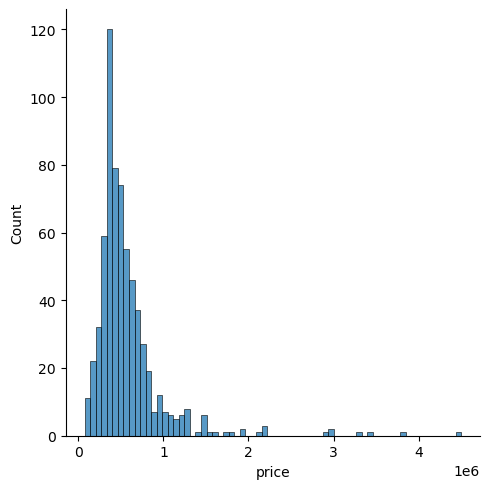

In [896]:
sns.displot(df["price"])

{'whiskers': [<matplotlib.lines.Line2D at 0x70bb4d067110>,
 'caps': [<matplotlib.lines.Line2D at 0x70bb4d067390>,
 'boxes': [<matplotlib.lines.Line2D at 0x70bb4d066fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x70bb4d067610>],
 'fliers': [<matplotlib.lines.Line2D at 0x70bb4d067750>],
 'means': []}

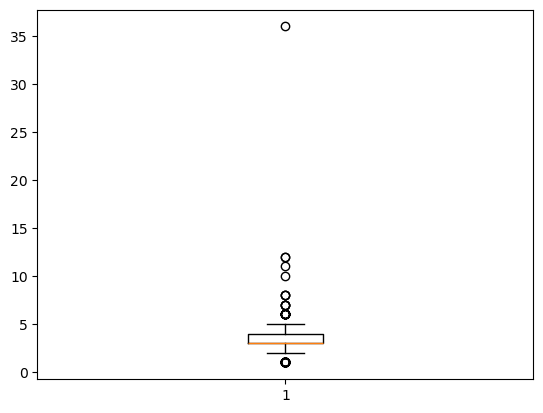

In [897]:
plt.boxplot(df["Bed"])

{'whiskers': [<matplotlib.lines.Line2D at 0x70bb5122ead0>,
 'caps': [<matplotlib.lines.Line2D at 0x70bb5122ed50>,
 'boxes': [<matplotlib.lines.Line2D at 0x70bb5122e990>],
 'medians': [<matplotlib.lines.Line2D at 0x70bb5122efd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x70bb5122f110>],
 'means': []}

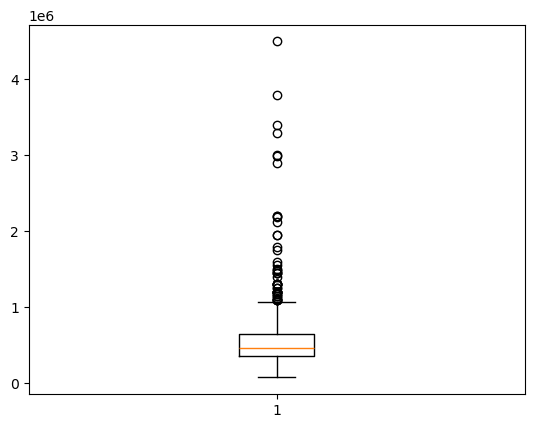

In [898]:
plt.boxplot(df["price"])

<Axes: xlabel='Ft', ylabel='price'>

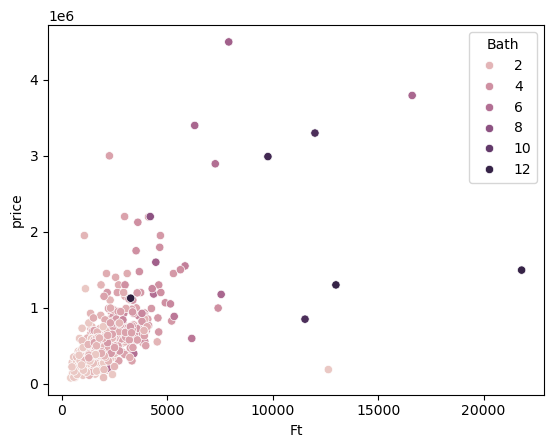

In [899]:
sns.scatterplot(x=df["Ft"], y=df["price"], hue=df["Bath"])

<Axes: ylabel='price'>

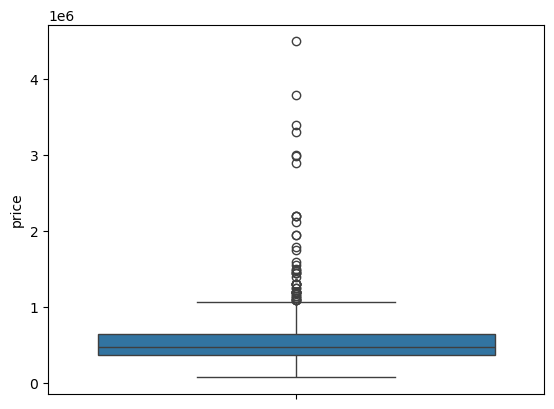

In [900]:
sns.boxplot(df["price"])

In [901]:
Q1 = df["Bed"].quantile(0.25)
Q3 = df["Bed"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["Bed"] >= lower_bound) & (df["Bed"] <= upper_bound)]

<Axes: ylabel='Bed'>

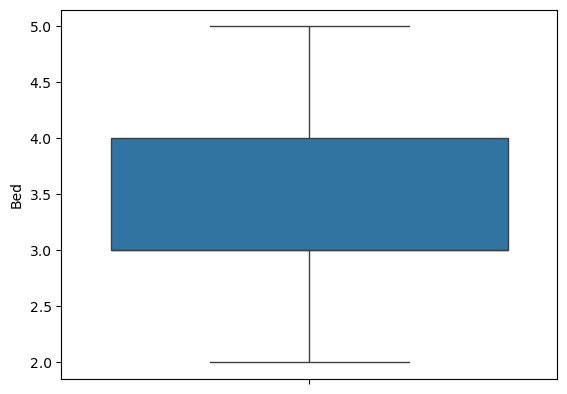

In [902]:
sns.boxplot(df["Bed"])

In [903]:
Q1 = df["Bath"].quantile(0.25)
Q3 = df["Bath"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["Bath"] >= lower_bound) & (df["Bath"] <= upper_bound)]

<Axes: ylabel='Bath'>

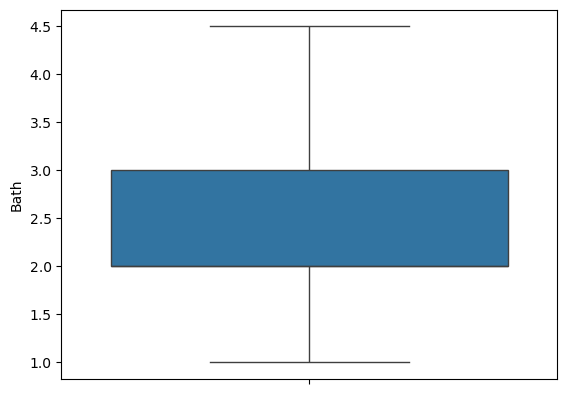

In [904]:
sns.boxplot(df["Bath"])

In [905]:
Q1 = df["Ft"].quantile(0.25)
Q3 = df["Ft"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["Ft"] >= lower_bound) & (df["Ft"] <= upper_bound)]

<Axes: ylabel='Ft'>

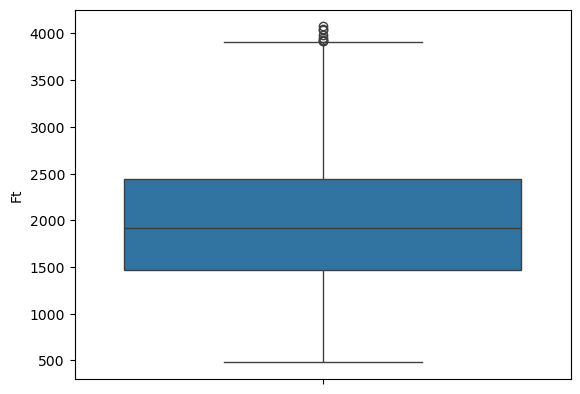

In [906]:
sns.boxplot(df["Ft"])

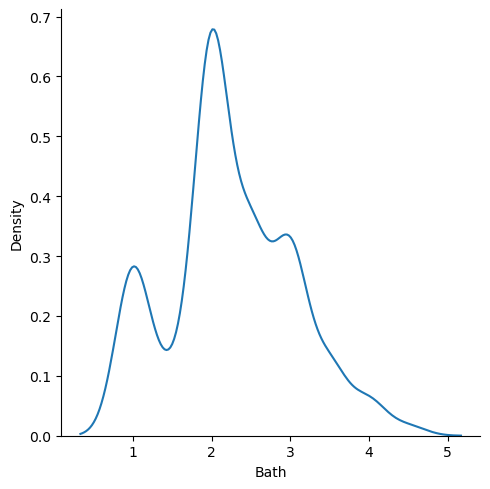

In [907]:
sns.displot(df["Bath"],kind="kde")

In [908]:
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["price"] >= lower_bound) & (df["price"] <= upper_bound)]

<Axes: ylabel='price'>

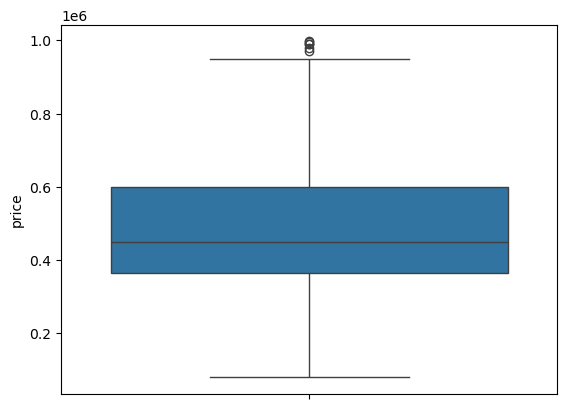

In [909]:
sns.boxplot(df["price"])

In [910]:
df["Bed"] = np.log1p(df["Bed"])

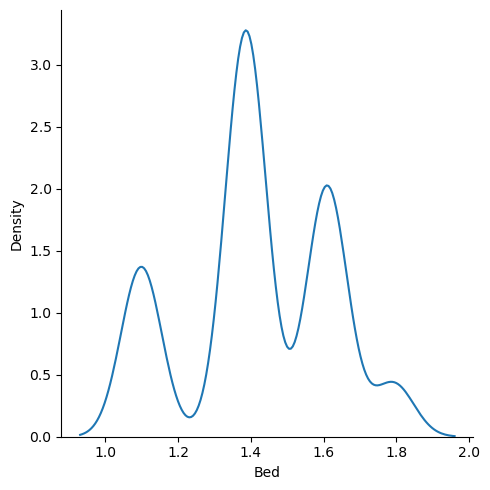

In [911]:
sns.displot(df["Bed"],kind="kde")

In [912]:
df["Bath"] = np.log1p(df["Bath"])

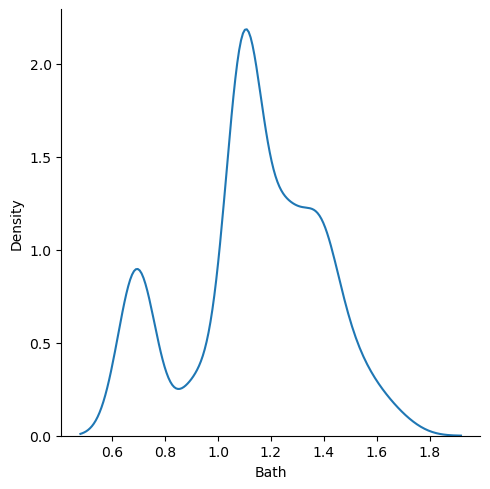

In [913]:
sns.displot(df["Bath"],kind="kde")


In [914]:
X = df.drop("price",axis=1)
y = df["price"]

In [915]:
X

,Bed,Bath,Ft
2,1.098612,0.693147,1571.0
5,1.098612,1.386294,2964.0
6,1.791759,1.386294,3658.0
8,1.609438,1.386294,2550.0
9,1.386294,1.386294,2532.0
...,...,...,...
695,1.791759,1.386294,3305.0
696,1.609438,1.252763,2175.0
697,1.609438,1.386294,2788.0
698,1.609438,1.386294,2500.0


In [916]:
y

2      365000.0
5      940000.0
6      747000.0
8      699000.0
9      725000.0
         ...   
695    669900.0
696    635000.0
697    948000.0
698    475000.0
699    339000.0
Name: price, Length: 544, dtype: float64

In [917]:
from sklearn.model_selection import train_test_split

In [918]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [919]:
X_train

,Bed,Bath,Ft
277,1.386294,1.098612,1625.0
248,1.098612,1.098612,1521.0
479,1.386294,1.098612,1840.0
699,1.386294,1.252763,1280.0
514,1.609438,1.098612,1362.0
...,...,...,...
105,1.098612,0.693147,1700.0
146,1.098612,1.098612,1850.0
348,1.098612,1.098612,2844.0
566,1.609438,1.098612,2208.0


In [920]:
from sklearn.linear_model import LinearRegression

In [921]:
reg = LinearRegression()

In [922]:
reg.fit(X_train, y_train)

LinearRegression()

In [923]:
y_pred = reg.predict(X_test)

In [924]:
y_pred

array([546546.21399546, 750267.57534194, 288340.12383476, 711910.16375746,
       589970.95342355, 448002.1912559 , 344078.77848322, 477054.22732431,
       625282.77301844, 610292.23144024, 361855.30174335, 736000.32559847,
       569880.96314031, 501000.73270917, 520440.5810957 , 444972.068664  ,
       442413.20156739, 743068.02657381, 455665.79302178, 287198.41000344,
       535405.93286977, 703280.50335707, 276352.12860582, 599407.56438593,
       248151.79697203, 715683.84508804, 344626.61571921, 256372.13655759,
       438846.42781247, 281718.18361306, 638165.64908902, 693410.22654183,
       777216.1949094 , 457570.53464624, 481318.18233786, 369464.43937633,
       305384.52212842, 449538.92398931, 688995.92825635, 427618.01842782,
       319229.03079791, 320079.76834567, 576393.45941443, 483944.12414991,
       701756.71181564, 367575.0637289 , 617415.1464176 , 539476.48882491,
       416885.90841334, 635992.21966137, 440946.58518134, 443869.96867031,
       547125.9714948 , 4

In [925]:
from sklearn.metrics import r2_score

In [927]:
r2_score(y_test, y_pred)

0.5615555273431757

In [928]:
import pickle

In [929]:
with open('model.pkl', 'wb') as fp:
    pickle.dump(reg, fp)